<a href="https://colab.research.google.com/github/Aloxxa/r_public/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_YallaMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1Uua3aKXymQ22NQI1ZlwAGRfof2MCjq3S

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Uua3aKXymQ22NQI1ZlwAGRfof2MCjq3S
To: /content/demo data.xlsx
100% 2.12M/2.12M [00:00<00:00, 179MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
from datetime import datetime
import sqlite3
con = sqlite3.connect('db')
def select(sql):
  return pd.read_sql(sql,con)

In [ ]:
data_o = pd.read_excel('/content/demo data.xlsx', sheet_name='orders')
data_r = pd.read_excel('/content/demo data.xlsx', sheet_name='registrations')

In [ ]:
dfo = data_o.copy()
dfo.sample(5)

,order_id,user_id,created_at,order_amount,discount
17162,63a6a8f2d25ed02bda51baaa,460268fe878a3d44e62ebe7dc1510c34,2022-12-24,35.50,0.0
7173,6356215304a5672ae9b3ecc6,652e01ca85ba4d0b85860011317b0c23,2022-10-24,32.50,0.0
8281,635cea68710b78fd239b6d6e,02c028c3c2b143c69f63cece337b00a8,2022-10-29,5.25,0.0
15133,638db55d64567bf45aa33489,bc83d78fd4b9093c05eaa250b7a01c5d,2022-12-05,78.54,0.0
2114,63e9ec25f59f5773ec2bff68,39c99c98566cf430d42c75992c5327a4,2023-02-13,35.00,0.0


In [ ]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21672 entries, 0 to 21671
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      21672 non-null  object        
 1   user_id       21672 non-null  object        
 2   created_at    21672 non-null  datetime64[ns]
 3   order_amount  21672 non-null  float64       
 4   discount      21672 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 846.7+ KB


In [ ]:
dfr = data_r.copy()
dfr.sample(5)

,user_id,created_at
83,d4e94c553f2179e41a4fca69488360c7,2022-12-28
10377,ea249b4407849cb7fd65f92810dad020,2022-10-08
14601,1f0922108ad0f7d95f929abd1e677831,2022-10-16
9250,2efce1eca270eda27fb213e222d6a3e7,2022-10-07
25992,d68584b4bcd7a2905ae6b220bf4e5c08,2022-11-03


In [ ]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33322 entries, 0 to 33321
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     33322 non-null  object        
 1   created_at  33322 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 520.8+ KB


In [ ]:
dfo.to_sql('dfo', con, if_exists='replace', index=False)
dfr.to_sql('dfr', con, if_exists='replace', index=False)

33322

1. Понимание проблемы: Начните с выявления возможных причин
оттока клиентов и проблем с удержанием клиентов в службе доставки быстрого питания
. Это может касаться таких аспектов, как качество обслуживания, доставка
скорость, ценовая конкурентоспособность и т.д. Кроме того, необходимо понять, какую
роль в этих аспектах играет сегментация RFM.

In [ ]:
dfo

,order_id,user_id,created_at,order_amount,discount
0,63da3cbf2d95d6499efa4191,449e112fc29c236d8a722173d1f45be6,2023-02-01,107.90,0.0
1,63e47bec3a63d2afb19a2190,5738b0aec9a5c0c8bb3acaf7e906076b,2023-02-09,39.00,0.0
2,63e9b561db223821d7f89a38,4816c12497b24bb139b0e244bd08428f,2023-02-13,14.50,0.0
3,63e8b439f59f5773ec2bf4d2,f5f25032a84e3092530b69cbcec7f046,2023-02-12,27.00,0.0
4,63e9c1bef59f5773ec2bfd45,487fbf3c3c120897bb6350a92a3dfc5d,2023-02-13,80.45,0.0
...,...,...,...,...,...
21667,63f63616699ca073b347d6a3,34a40a5d4a2f0668ad7ec18eac2ea145,2023-02-22,25.77,6.0
21668,63f5d61577323b8c3ee0c3b8,0dc1eb379f9abdfa4cfb5532b000da54,2023-02-22,123.25,0.0
21669,63f5b7dedb223821d7f91280,324641667b092f080b71133aa1012dee,2023-02-22,5.50,0.0
21670,63f62e0f699ca073b347d61b,3167f5e9308f9e58659e47f474d4538b,2023-02-22,43.00,12.9


In [ ]:
round(dfo.shape[0]/dfo['user_id'].unique().shape[0])

4

In [ ]:
dfo['order_count'] = dfo.groupby('user_id')['user_id'].transform('count')

<Axes: xlabel='count_orders', ylabel='Count'>

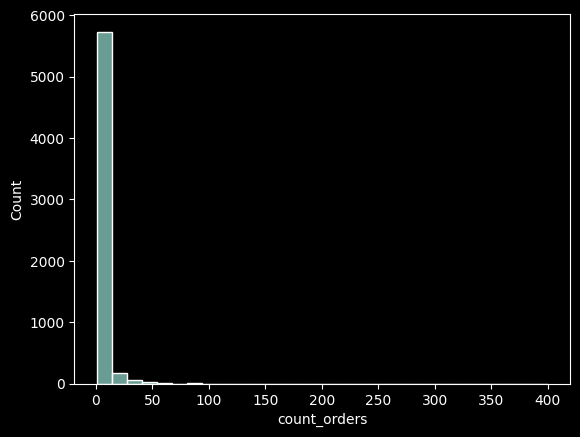

In [ ]:
t = dfo.groupby('user_id').order_id.count().reset_index(name='count_orders')
sns.histplot(data=t, x='count_orders', bins=30)

In [ ]:
dfl4 = dfo[dfo['order_count']<=4]
dfm4 = dfo[dfo['order_count'] > 4]

In [ ]:
print(dfl4.shape[0])
print(dfm4.shape[0])

6938
14734


In [ ]:
print('dfl4 mean discount', dfl4.discount.mean())
print('dfm4 mean discount',dfm4.discount.mean())

dfl4 mean discount 6.513988506774286
dfm4 mean discount 2.849675173069092


In [ ]:
print('dfl4 mean order_amount', dfl4.order_amount.mean())
print('dfm4 mean order_amount',dfm4.order_amount.mean())

dfl4 mean order_amount 74.63658057076967
dfm4 mean order_amount 70.56599748201437


<Axes: xlabel='last_order', ylabel='Count'>

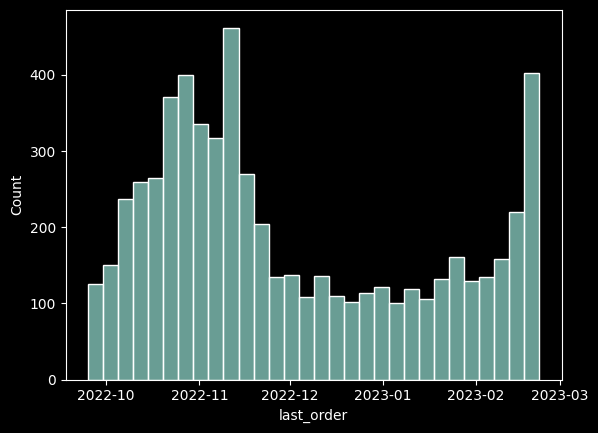

In [ ]:
t = dfo.groupby('user_id').created_at.max().reset_index(name='last_order')
sns.histplot(data=t, x='last_order', bins=30)

In [ ]:
df = pd.merge(dfo, dfr, on='user_id', suffixes=('_order', '_reg'))

In [ ]:
df['last_order_date'] = df.groupby('user_id')['created_at_order'].transform('max')

In [ ]:
current_date = datetime.now()
df['days_since_last_order'] = (current_date - df['last_order_date']).dt.days

In [ ]:
df['time_to_first_order'] = (df['created_at_order'] - df['created_at_reg']).dt.days

In [ ]:
df['discount_amount'] = df['order_amount'] * df['discount']

In [ ]:
rfm = df.groupby('user_id').agg(
    recency=('days_since_last_order', 'min'),
    frequency=('order_id', 'count'),
    monetary=('order_amount', 'sum')
).reset_index()

In [ ]:
rfm['recency_segment'] = pd.qcut(rfm['recency'], q=4, duplicates='drop')
rfm['frequency_segment'] = pd.qcut(rfm['frequency'], q=4, duplicates='drop')
rfm['monetary_segment'] = pd.qcut(rfm['monetary'], q=4, duplicates='drop')

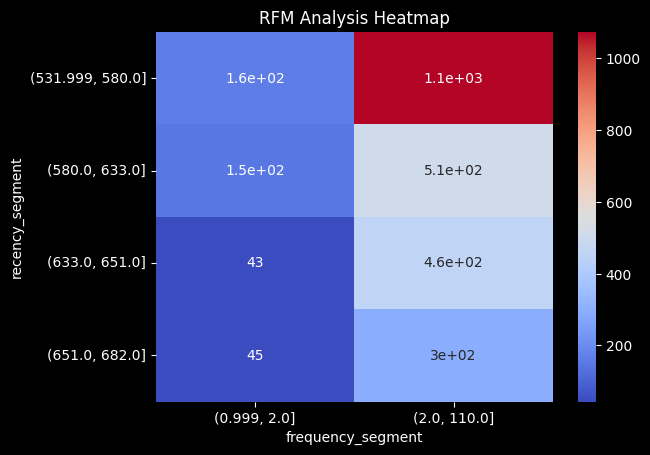

In [ ]:
pivot_rfm = rfm.pivot_table(index='recency_segment', columns='frequency_segment', values='monetary', aggfunc='mean')
sns.heatmap(pivot_rfm, annot=True, cmap='coolwarm')
plt.title('RFM Analysis Heatmap')
plt.show()

2 Анализ данных: Используя реальные или гипотетические данные, проведите
анализ поведения клиентов, уделяя особое внимание выявленным проблемам.
Этот анализ должен учитывать множество переменных, включая, но не
ограничиваясь ими, частоту заказов, среднюю стоимость заказа и другие
важные факторы.

In [ ]:
df

,order_id,user_id,created_at_order,order_amount,discount,order_count,created_at_reg,last_order_date,days_since_last_order,time_to_first_order,discount_amount
0,63da3cbf2d95d6499efa4191,449e112fc29c236d8a722173d1f45be6,2023-02-01,107.90,0.00,1,2023-02-01,2023-02-01,553,0,0.000
1,63e9b561db223821d7f89a38,4816c12497b24bb139b0e244bd08428f,2023-02-13,14.50,0.00,1,2023-02-13,2023-02-13,541,0,0.000
2,63c6e1c963aa9803be97fc90,48545437b097f9289f97ff2c6d2da59f,2023-01-17,18.95,0.00,13,2022-12-01,2023-01-25,560,47,0.000
3,639ff647113c9390104c5c1c,48545437b097f9289f97ff2c6d2da59f,2022-12-19,35.41,0.00,13,2022-12-01,2023-01-25,560,18,0.000
4,63ccedff06690a3c6b89b260,48545437b097f9289f97ff2c6d2da59f,2023-01-22,76.83,0.00,13,2022-12-01,2023-01-25,560,52,0.000
...,...,...,...,...,...,...,...,...,...,...,...
11944,63f617e78427e281b7e3db30,1c188baf472f0039fc4b78aaef0fb7d3,2023-02-22,92.22,0.00,1,2023-02-15,2023-02-22,532,7,0.000
11945,63f66c44699ca073b347d965,c4bb0c5eca3ef28650efd8cef4fe857c,2023-02-22,53.40,16.02,1,2023-01-15,2023-02-22,532,38,855.468
11946,63f622d18427e281b7e3db84,c4a7cbf1b54c2a39e3634e1a04fe3b2e,2023-02-22,49.00,0.00,1,2022-11-23,2023-02-22,532,91,0.000
11947,63f5b7dedb223821d7f91280,324641667b092f080b71133aa1012dee,2023-02-22,5.50,0.00,1,2023-02-22,2023-02-22,532,0,0.000


In [ ]:
df.groupby('user_id').size().reset_index(name='order_count').sort_values(by='order_count', ascending=False)

,user_id,order_count
3012,b1d9bf7d681130232c743a10714f35f3,110
3228,bda9250503ce6c26497732d3b3014ede,82
766,2ed076b380f06e2976db94a35263949f,82
4075,efffc2dfe505627d858e985ff94863c5,62
148,092924ff4bfa94e86d129b589da8feaf,61
...,...,...
1720,6603a1c873a30f2e871584588188da8b,1
1721,660fe8ec65b8871218403a64e3aa1ab3,1
1722,6613dbd2df2a4b761ab9729ac48a139c,1
1723,6616dd9379af1c31149e6cb46ce76418,1


In [ ]:
df.groupby('user_id').order_amount.mean().reset_index(name='order_amount').sort_values(by='order_amount', ascending=False)

,user_id,order_amount
1731,66c20844696190cb16eca07a9904a76e,10540.00
3240,be7624392a55f5de6ebd4b7e2fb2f264,5960.00
4341,ff3e7188dfc1a0c22e409adf15b5d9a8,5950.00
3977,ea1ca85932679ab988d086dff17b975a,5467.50
227,0e10b10c4d97c6bd90e5a31f973c3bb4,5420.00
...,...,...
1830,6c48c2a630f311cadce1ab9302c37b2c,1.79
3946,e8a1933bcd73023c0704bbbcf975ffb7,1.07
141,08b8caec4e4c7298ebc98d9de7e7debb,0.00
374,164f3d9d0327efcf7839970b0109c22e,0.00


In [ ]:
current_date = dfo['created_at'].max()

In [ ]:
rfm = df.groupby('user_id').agg({
    'created_at_order': lambda x: (current_date - x.max()).days,
    'order_id': 'count',
    'order_amount': 'sum'
}).reset_index()
rfm.columns = ['user_id', 'recency', 'frequency', 'monetary']
rfm

,user_id,recency,frequency,monetary
0,0042f6f65862ff7f84d75ac9cbc90493,93,3,133.77
1,00550dbe72634dc5695f8ac73bc296fe,91,2,91.52
2,007c08a1b2fdc8be6a541704b911f264,51,3,59.27
3,008bbf5ca93dc499258b6801a6b45592,111,1,41.55
4,0095743cf161a2b80e597ba254d64e17,99,1,28.75
...,...,...,...,...
4356,ffa2fb08ea14c5eedfe629de907e6773,15,1,21.52
4357,ffa3ea9bb0ade306be324f8f7d65c8db,107,1,30.25
4358,ffa5496d3e58492de970757e7a7a3ff4,99,1,24.65
4359,ffccf44a8b32ba1f1a78a73971462a0d,116,1,28.35


In [ ]:
rfm['recency'] = pd.qcut(rfm['recency'], q=4, labels=False, duplicates='drop')
rfm['frequency'] = pd.qcut(rfm['frequency'], q=4, labels=False, duplicates='drop')
rfm['monetary'] = pd.qcut(rfm['monetary'], q=4, labels=False, duplicates='drop')
rfm

,user_id,recency,frequency,monetary
0,0042f6f65862ff7f84d75ac9cbc90493,1,1,2
1,00550dbe72634dc5695f8ac73bc296fe,1,0,2
2,007c08a1b2fdc8be6a541704b911f264,1,1,2
3,008bbf5ca93dc499258b6801a6b45592,2,0,2
4,0095743cf161a2b80e597ba254d64e17,1,0,1
...,...,...,...,...
4356,ffa2fb08ea14c5eedfe629de907e6773,0,0,0
4357,ffa3ea9bb0ade306be324f8f7d65c8db,2,0,1
4358,ffa5496d3e58492de970757e7a7a3ff4,1,0,0
4359,ffccf44a8b32ba1f1a78a73971462a0d,2,0,1


In [ ]:
pivot_rfm = rfm.pivot_table(index='recency', columns='frequency', values='monetary', aggfunc='mean')
pivot_rfm

frequency,0,1
recency,,
0,1.629816,2.905325
1,1.418794,2.839844
2,0.951409,2.754717
3,0.864258,2.818182


<Axes: xlabel='frequency', ylabel='recency'>

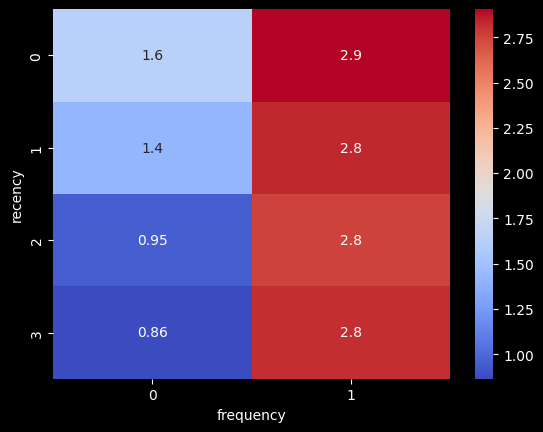

In [ ]:
sns.heatmap(pivot_rfm, annot=True, cmap='coolwarm')